In [2]:
#import  libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
#Build the model
i = Input(shape = x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)

In [7]:
#Compile and train
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 96s 50ms/step - loss: 0.3301 - accuracy: 0.8958 - val_loss: 0.1379 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1025 - accuracy: 0.9690 - val_loss: 0.0804 - val_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 0.0806 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0639 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0452 - accuracy: 0.9866 - val_loss: 0.0551 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0474 - val_accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0383 -

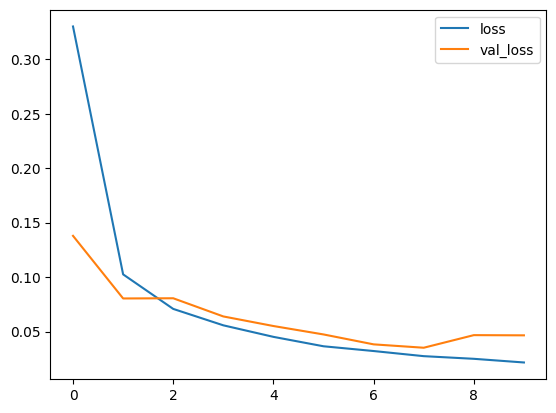

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

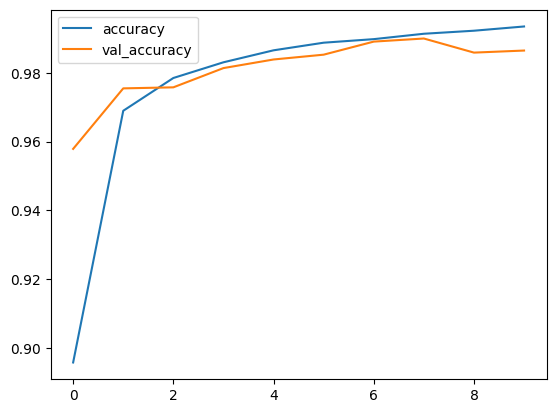

In [9]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 4s 10ms/step
Confusion matrix, without normalization
[[ 974    0    0    0    0    1    4    1    0    0]
 [   0 1127    5    1    0    0    1    1    0    0]
 [   2    1 1019    0    0    0    2    7    1    0]
 [   0    0    7 1001    0    1    0    1    0    0]
 [   2    0    0    0  955    0    4    3    0   18]
 [   1    0    0   14    0  876    1    0    0    0]
 [   1    3    0    0    3    3  948    0    0    0]
 [   1    4    5    0    1    0    0 1015    0    2]
 [   1    0    3    1    1    4    4    2  955    3]
 [   1    0    0    1    3    1    0    5    3  995]]


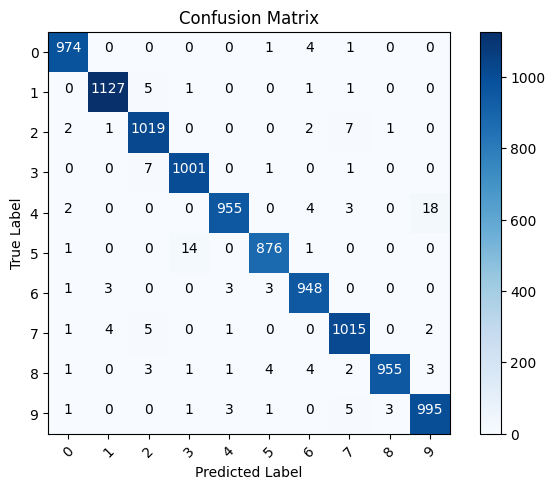

In [10]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize = True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



Text(0.5, 1.0, 'True label: 2  Predicted label: 7')

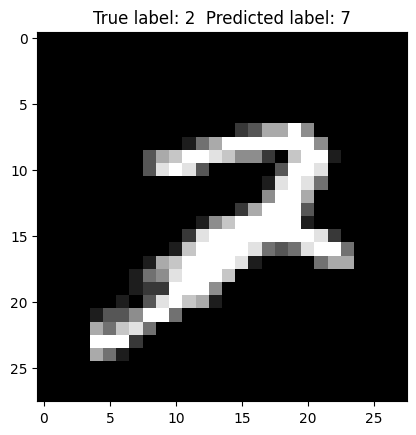

In [17]:
# misclassified prediction
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s  Predicted label: %s" % (y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label: 1  Predicted label: 1')

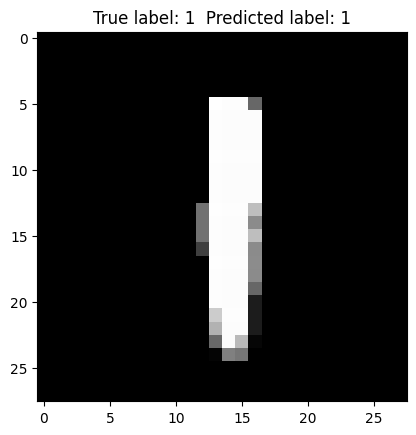

In [18]:
#correctly predicted classification
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s  Predicted label: %s" % (y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label: 8  Predicted label: 8')

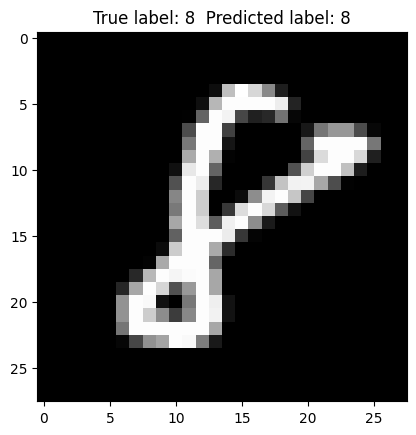

In [20]:
#Prediction
classified_idx = np.where(p_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s  Predicted label: %s" % (y_test[i], p_test[i]))